# Introduction

The purpose of this data science project is to perform a customer segmentation, which is critical practice in the marketing sector that enables businesses to tailor their strategies more effectively and improve customer engagement. By dividing customers into distinct groups based on shared characteristics, companies can create highly targeted marketing campaigns, optimize resource allocation, and ultimately enhance customer satisfaction and loyalty.

## Customer Segmentation

In today’s competitive market landscape, understanding the diverse needs and behaviors of customers is an essential task. Customer segmentation allows businesses to:
- **Personalize Marketing:** Deliver tailored messages and offers that resonate with specific groups.
- **Enhance Customer Service:** Understand and anticipate the needs of different segments to improve service delivery.
- **Optimize Pricing Strategies:** Adjust pricing based on the purchasing behavior and sensitivity of different segments.
- **Drive Product Development:** Design or modify products to meet the specific needs of targeted segments.

## Exploring KMeans Clustering

To achieve effective segmentation, we will be utilizing the KMeans clustering algorithm, a popular unsupervised machine learning technique known for its simplicity and efficiency. KMeans identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. This method is particularly useful in the context of marketing, where understanding and visualizing customer groupings can directly inform and influence strategic decisions.

In this notebook, we will apply the KMeans algorithm to a dataset containing various customer attributes to identify meaningful segments. The analysis includes:
- Data preprocessing suitable for KMeans.
- Determining the optimal number of clusters.
- Analyzing and profiling each customer segment to draw actionable insights.

The goal is to explore the dynamics of customer segmentation through KMeans clustering, and uncover actionable insights that can significantly enhance marketing strategies.

# Data Overview

**People**

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

In [4]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

In [5]:
# import data
spreadsheet = 'https://docs.google.com/spreadsheets/d/1O9OVzIdsDl5mZKDvrlHNnsTY9e1W0DfDWWRU3rFxPC4/export?format=csv'

# Baca data ke dalam DataFrame
data = pd.read_csv(spreadsheet)

print("Number of rows:", len(data))

# Set display options to show all columns
pd.set_option('display.max_columns', None)

data.head()

Number of rows: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [6]:
#Information on features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**Observations:**

* There are missing values in column `income`.
* `Dt_Customer` indicates the date a customer joined the database is not set as DateTime.
* There are two categorical features in the data, thus we need to encode them into numeric forms before modeling.

# Data Cleaning

**Removing rows with missing values**

Here we have two options:
- Replace the missing values with their respect column average or median
- Drop the rows having a missing value

The column `Income` has 24 missing values, representing only 1% of the total. I believe we can drop them without any impact on the analysis.

In [7]:
#To remove the NA values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


# Exploring the categorical features

In [8]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


# Dealing with Outliers

In [9]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**Oberservations:**
- The column `Income` has an extreme value (666666) that can be considered an outlier, too far from the average and median. Therefore, we can drop this row.
- The column `Year_Birth` also has some outliters that need to be removed.

In [10]:
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2215


In [11]:
sorted_data = data.sort_values(by='Year_Birth')

sorted_data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0
1950,6663,1940,PhD,Single,51141.0,0,0,08-07-2013,96,144,0,7,0,0,6,1,3,1,4,5,0,0,0,0,0,0,3,11,0
424,6932,1941,PhD,Married,93027.0,0,0,13-04-2013,77,1285,42,716,55,0,21,0,7,10,5,2,0,0,1,0,0,0,3,11,0
1923,4994,1943,Master,Single,77598.0,0,0,01-10-2013,53,1193,33,281,129,66,33,1,7,5,13,3,0,0,1,0,0,0,3,11,0
415,7106,1943,PhD,Married,75865.0,0,0,31-03-2014,73,483,0,591,156,0,12,1,3,5,10,1,0,0,0,0,0,0,3,11,0
1150,1453,1943,PhD,Widow,57513.0,0,0,06-07-2013,59,735,40,183,52,20,30,2,9,3,13,6,0,0,0,0,0,0,3,11,0
894,8800,1943,PhD,Divorced,48948.0,0,0,01-02-2013,53,437,8,206,160,49,42,2,7,10,5,6,1,0,0,0,0,0,3,11,1
358,6142,1943,Master,Married,65073.0,0,0,20-08-2013,65,629,17,177,69,0,8,1,5,3,5,2,0,0,0,0,0,1,3,11,0


Removing the rows where `Year_Birth` is lower than 1940.

In [12]:
# Keep only rows where 'Year_Birth' is 1940 or later
data = data[data['Year_Birth'] >= 1940]

print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


# Feature Engineering

**Feature Engineering for Enhanced Data Insight**

To gain deeper insights from our dataset, we will engineer new features based on existing ones. Below are the enhancements we plan to implement:

1. **Age Calculation**: Derive the "Age" of a customer from the "Year_Birth" to better understand the demographic distribution.
2. **Total Spending**: Introduce a new feature "Spent" that aggregates the total expenditures of a customer across all subcategories, providing a holistic view of customer spending behavior.
3. **Living Situation**: Generate a "Living_With" feature from "Marital_Status" to categorize customers as living with a "Partner" or living "Alone," which aids in understanding household dynamics.
4. **Household Children Count**: Create a "Children" feature to count the total number of children in a household, encompassing both kids and teenagers.
5. **Household Size**: Establish a "Family_Size" feature that sums "Living_With" and "Children" to provide a clearer picture of the household's composition.
6. **Simplify Education Levels**: Simplify the "Education" field into three broad categories to streamline analysis and reduce complexity.
7. **Feature Reduction**: Drop redundant features that will not be utilized in the modeling process to streamline the dataset and focus on the most impactful variables.

These transformations are designed to enhance our analytical capabilities and improve the effectiveness of our subsequent modeling efforts.

In [13]:
# Calculate the age
data['Age'] = 2021 - data['Year_Birth']

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status
data["Living_With"] = data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

data["Living_With"] = data["Living_With"].replace({"Alone": 1, "Partner":2})
#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"] + data["Children"]

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "ID", "Year_Birth"]
data = data.drop(to_drop, axis=1)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   object 
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   int64 

In [15]:
data[['Age','Living_With', 'Children', 'Family_Size', 'Income', 'Spent', 'Complain']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2212.0,52.086347,11.701599,25.0,44.0,51.0,62.0,81.0
Living_With,2212.0,1.645570,0.478449,1.0,1.0,2.0,2.0,2.0
Children,2212.0,0.947559,0.749466,0.0,0.0,1.0,1.0,3.0
Family_Size,2212.0,2.593128,0.906236,1.0,2.0,3.0,3.0,5.0
Income,2212.0,51958.810579,21527.278844,1730.0,35233.5,51371.0,68487.0,162397.0
Spent,2212.0,607.268083,602.513364,5.0,69.0,397.0,1048.0,2525.0
Complain,2212.0,0.009042,0.094678,0.0,0.0,0.0,0.0,1.0


# Exploratory Data Analysis

## Univariate Analysis

Univariate analysis involves examining the distribution and characteristics of a single variable in a dataset, often through statistical summaries and visualizations like histograms or bar plots. By plotting the frequency of each feature, we can gain insights into the central tendency (like mean or median), dispersion (such as range and variance), and the presence of outliers or skewness in the data. This analysis helps identify patterns, anomalies, or typical values within each feature, which are crucial for understanding the overall data structure and informing further analysis or preprocessing steps.

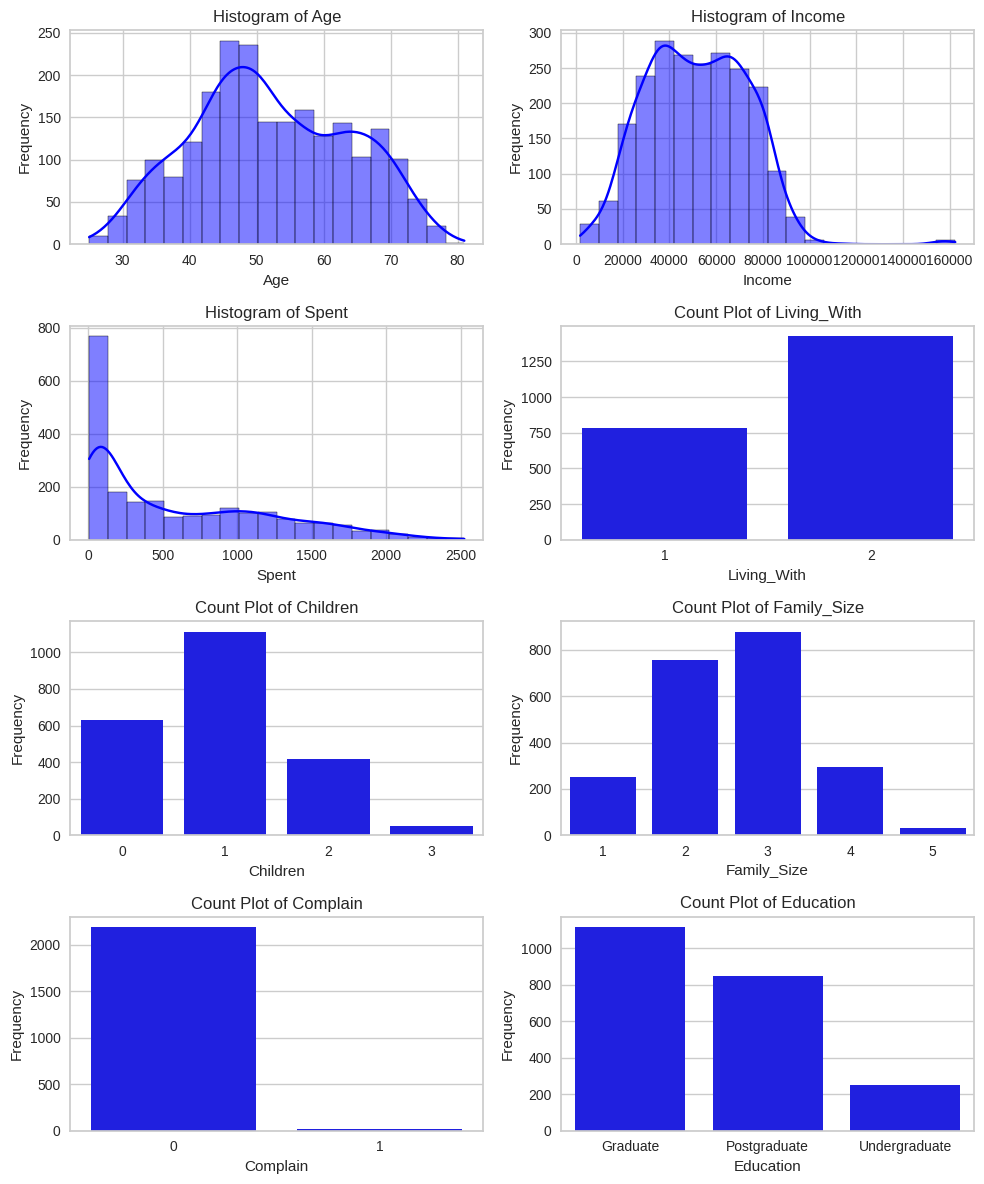

In [16]:
continuous_columns = ['Age', 'Income', 'Spent']
categorical_columns = ['Living_With', 'Children', 'Family_Size', 'Complain', 'Education']
all_columns = continuous_columns + categorical_columns

# Calculate the number of rows needed for two columns
num_rows = (len(all_columns) + 1) // 2

# Setup the matplotlib figure and axes
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(10, num_rows * 3))
axes = axes.flatten()  # Flatten the axes array to make indexing easier

# Iterate over the columns and create appropriate plots
for i, col in enumerate(all_columns):
    if col in continuous_columns:
        sns.histplot(data=data, x=col, bins=20, ax=axes[i], kde=True, color='blue')  # Add density curve for continuous data
        axes[i].set_title(f'Histogram of {col}')
    elif col in categorical_columns:
        sns.countplot(data=data, x=col, ax=axes[i], color='blue')
        axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# If the number of columns is odd, hide the last subplot (if unused)
if len(all_columns) % 2 != 0:
    axes[-1].set_visible(False)  # Hide the last axis if not needed

# Adjust layout
plt.tight_layout()
plt.show()


## Bivariate Analysis (features correlation)

Before proceed with the Data Preprocessing and the Machine Learning step, let's visualize the some data correlation and trends.

**Income x Total Spent:**

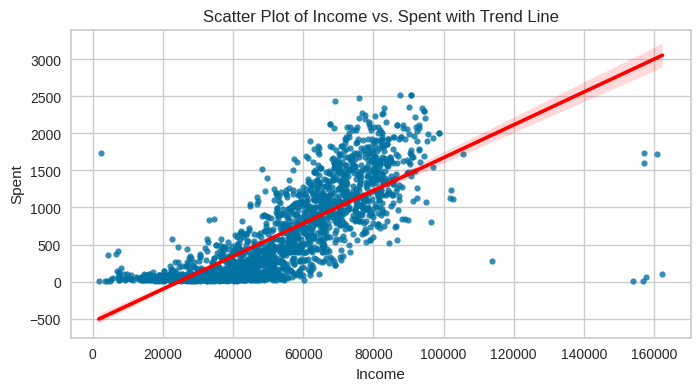

In [17]:
# Create the scatter plot with a regression line
plt.figure(figsize=(8, 4))
sns.regplot(x='Income', y='Spent', data=data, scatter_kws={'s': 20}, line_kws={'color': 'red'})

plt.title('Scatter Plot of Income vs. Spent with Trend Line')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.show()

`Income` and `Spent` are two numerical features strongly correlated. There are some outliers, but I believe it is not necessary to drop them or perform an imputation technique.

**Average Spent x Age groups:**

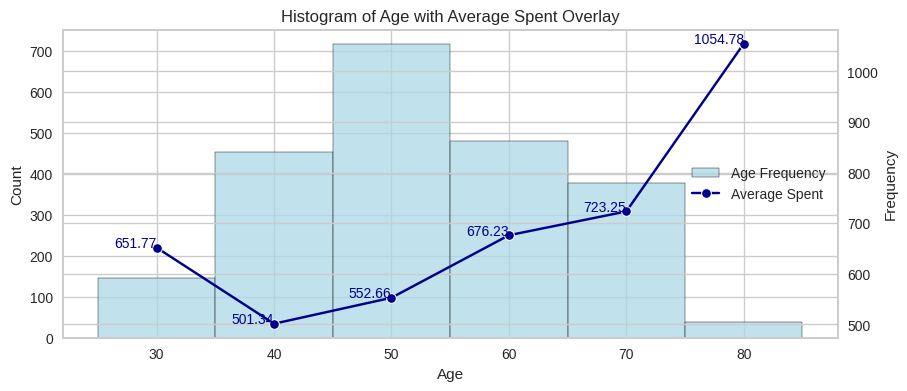

In [18]:
# Create bins for the 'Age' column
bins = np.arange(data['Age'].min(), data['Age'].max() + 10, 10)  # Adjust the bin width as necessary
bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Calculate bin centers

data['Age_bins'] = pd.cut(data['Age'], bins=bins, include_lowest=True)

# Group by the bins and calculate the mean of 'Spent'
grouped = data.groupby(pd.cut(data['Age'], bins=bins, labels=bin_centers))['Spent'].mean().reset_index()
grouped.columns = ['Age_bins', 'Spent']

# Plotting
plt.figure(figsize=(10, 4))
sns.histplot(data=data, x='Age', bins=bins, color='lightblue', kde=False, stat='count', label='Age Frequency')

# Create a secondary y-axis for the line plot
ax2 = plt.twinx()
lineplot = sns.lineplot(data=grouped, x='Age_bins', y='Spent', ax=ax2, color='darkblue', marker='o', label='Average Spent')

# Setting labels and title
plt.title('Histogram of Age with Average Spent Overlay')
plt.xlabel('Age')
ax2.set_ylabel('Average Spent')
plt.ylabel('Frequency')

# Adding text labels at each point
for x, y in zip(grouped['Age_bins'], grouped['Spent']):
    ax2.text(x, y, f'{y:.2f}', color='darkblue', ha='right', size=10)

# Handling legends
handles, labels = [], []
for ax in plt.gcf().axes:
    for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
plt.legend(handles, labels, loc='center right')

plt.show()


**Average Spent x Education and Family_Size**

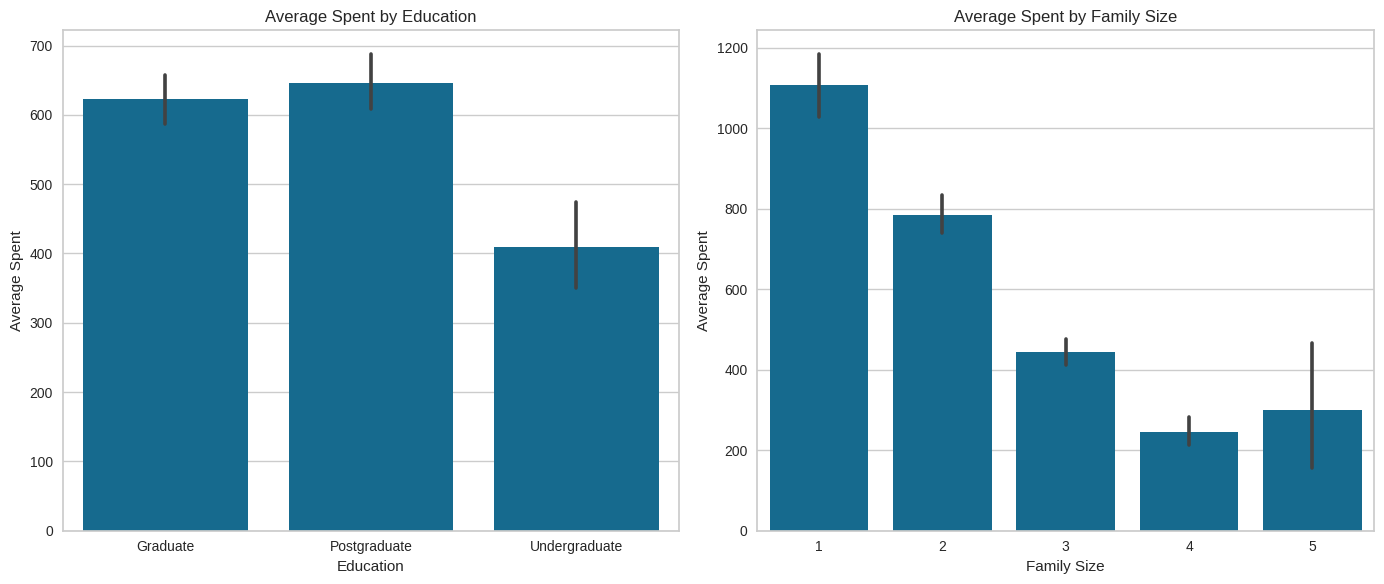

In [19]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# First subplot: Average "Spent" by "Education"
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.barplot(x='Education', y='Spent', data=data)
plt.title('Average Spent by Education')
plt.xlabel('Education')
plt.ylabel('Average Spent')

# Second subplot: Average "Spent" by "Children"
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.barplot(x='Family_Size', y='Spent', data=data)
plt.title('Average Spent by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Average Spent')

# Adjust layout
plt.tight_layout()

plt.show()

We can observe that Postgraduate customers has the highest average Spent. Single (living alone) customers has the highest average Spent.

**Places of Purchase:**

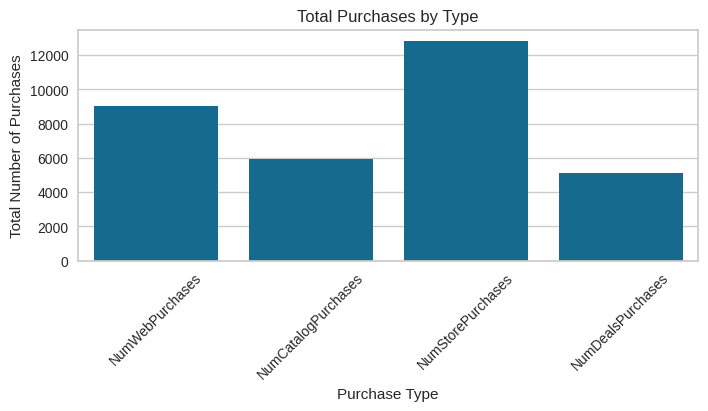

In [20]:
# Create a new dataframe that sums up each purchase type
totals = {
    'Purchase Type': ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases'],
    'Total Purchases': [
        data['NumWebPurchases'].sum(),
        data['NumCatalogPurchases'].sum(),
        data['NumStorePurchases'].sum(),
        data['NumDealsPurchases'].sum()
    ]
}

df_totals = pd.DataFrame(totals)

# Create the bar chart
plt.figure(figsize=(8, 3))
sns.barplot(x='Purchase Type', y='Total Purchases', data=df_totals)
plt.title('Total Purchases by Type')

plt.ylabel('Total Number of Purchases')
plt.xticks(rotation=45)  # Rotates labels to avoid overlap
plt.show()

In-store purchasing is the most frequent type of purchase among all consumers.

**Analyzing the Campaigns performance:**

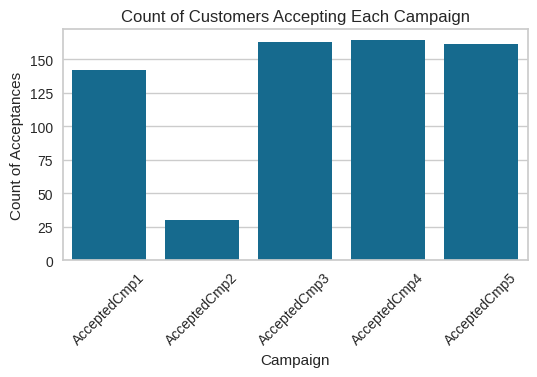

In [21]:
# Calculate the count of acceptances for each campaign
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
counts = data[campaigns].sum().reset_index()
counts.columns = ['Campaign', 'Count of Acceptances']

# Create the bar chart
plt.figure(figsize=(6, 3))
sns.barplot(x='Campaign', y='Count of Acceptances', data=counts)
plt.title('Count of Customers Accepting Each Campaign')
plt.xlabel('Campaign')
plt.ylabel('Count of Acceptances')
plt.xticks(rotation=45)
plt.show()

The acceptance and purchase rates for the campaigns are low, with less than 10% of total customers participating. However, campaigns 3, 4, and 5 saw higher acceptance rates compared to campaigns 1 and 2, with campaign 2 performing the worst.

# Data Preprocessing

We have to perform feature engineering to prepare the data for machine learning. The step includes:
- Label encoding the categorical features.
- Scaling the features using the standard scaler.
- Create a subset dataframe for dimensionality reduction using PCA.

In [22]:
#Get list of categorical variables
cat = (data.dtypes == 'object')
object_cols = list(cat[cat].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education']


In [23]:
# Creating a dictionary for manual label encoding
education_mapping = {
    "Undergraduate": 0,
    "Graduate": 1,
    "Postgraduate": 2
}

# Apply the mapping to the 'Education' column
data['Education'] = data['Education'].map(education_mapping)

In [24]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

In [25]:
print(data["Living_With"].value_counts())
print(data["Education"].value_counts())

Living_With
2    1428
1     784
Name: count, dtype: int64
Education
1    1115
2     845
0     252
Name: count, dtype: int64


Now, we have all the data types as numeric.

In [26]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Complain', 'Response', 'Age_bins']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns)
print("All features are now scaled")

All features are now scaled


In [27]:
scaled_ds.head(5)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size
0,-0.411675,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,0.852576,0.351030,1.426865,2.503607,-0.555814,0.692181,1.018352,1.676245,-1.349603,-1.264598,-1.758359
1,-0.411675,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,-0.733642,-0.168701,-1.126420,-0.571340,-1.171160,-0.132545,1.274785,-0.963297,-1.349603,1.404572,0.449070
2,-0.411675,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,-0.037254,-0.688432,1.426865,-0.229679,1.290224,-0.544908,0.334530,0.280110,0.740959,-1.264598,-0.654644
3,-0.411675,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,-0.752987,-0.168701,-0.761665,-0.913000,-0.555814,0.279818,-1.289547,-0.920135,0.740959,0.069987,0.449070
4,1.123949,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,-0.559545,1.390492,0.332600,0.111982,0.059532,-0.132545,-1.033114,-0.307562,0.740959,0.069987,0.449070


# Dimensionality Reduction

Dimensionality reduction is a critical preprocessing step before employing KMeans clustering for several reasons:

- **Improving Clustering Performance:** KMeans clustering calculates distances between points to form clusters. In high-dimensional spaces, distance metrics can become less meaningful—a phenomenon known as the "curse of dimensionality." Reducing the number of dimensions helps mitigate this issue, making the distance metric more reliable and the clustering results more meaningful.

- **Enhanced Visualization:** Visualization is a powerful tool for interpreting clustering results. However, visualizing high-dimensional data directly is not feasible. Reducing the data to two or three dimensions allows for effective visualization, enabling easier analysis and communication of the clustering outcomes.

- **Feature Selection and Noise Reduction:** Dimensionality reduction techniques like Principal Component Analysis (PCA) not only reduce the data dimensions but also help in identifying the most significant variables. This can be viewed as a form of feature selection, where only the features that contribute most to the variance in the data are retained. By focusing on these key features, KMeans can produce more distinct and interpretable clusters.

## Dimensionality reduction with Principal Component Analysis (PCA)

PCA is a statistical technique used in data analysis to emphasize variation and bring out strong patterns in a dataset. PCA helps in identifying correlations and patterns in data that are not easily identified in raw data. The technique transforms the original variables into a new set of variables, which are called principal components. These principal components are orthogonal (meaning they are uncorrelated), and they are ordered so the first few retain most of the variation present in all of the original variables. PCA is widely used for dimensionality reduction in machine learning and data visualization.

The following PCA steps efficiently reduces the dimensionality of the data while attempting to retain the most significant variance present in the original dataset, which is often crucial for visualization, noise reduction, and speeding up further analysis.

The PCA object is initialized with `n_components=3`. This specifies that the PCA transformation will reduce the dimensionality of the dataset to three principal components.

In [28]:
#Initiating PCA to reduce dimentions to 3
pca = PCA(n_components=3)

# Fitting the PCA Model:
pca.fit(scaled_ds)

# Transforming the Data and Creating a DataFrame:
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))

# Descriptive statistics
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-8.994212e-17,2.797451,-5.832780,-2.500727,-0.746865,2.399444,7.288412
col2,2212.0,0.000000e+00,1.637053,-3.997561,-1.318294,-0.093448,1.182027,6.421633
col3,2212.0,8.030546e-18,1.192434,-3.498349,-0.887368,-0.002603,0.820839,5.043111


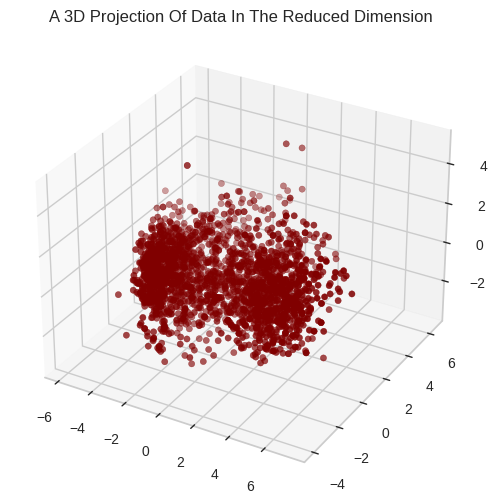

In [29]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Clustering - Customer Segmentation

The steps involved in the Clustering are:
- Elbow Method to determine the optimum number of clusters
- Employ the KMeans (Clustering)
- Examining the clusters

Elbow Method to determine the number of clusters to be formed:


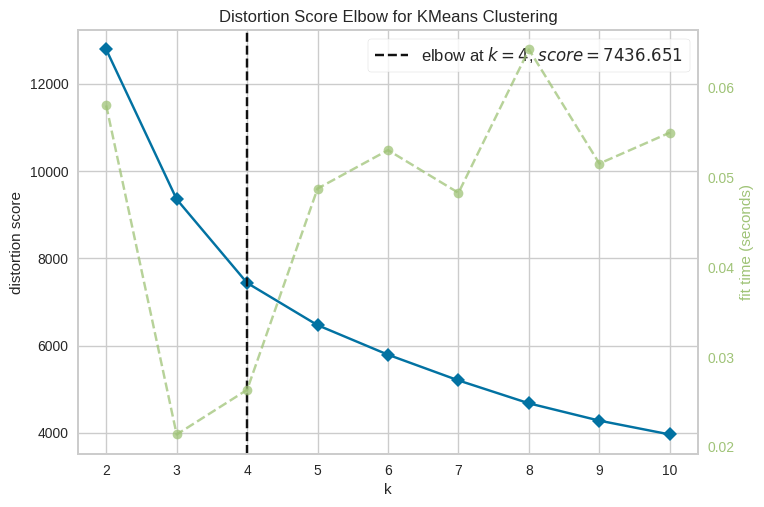

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=42), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

The visual above indicates that four is the optimum number of clusters for the data.

In [31]:
# Initiating the KMeans Clustering model
kmeans = KMeans(n_clusters=4, random_state=42)
# Fit model and predict clusters
cluster_labels = kmeans.fit_predict(PCA_ds)  # Changed variable name from yhat_kmeans to cluster_labels
PCA_ds["Clusters"] = cluster_labels
# Adding the Clusters feature to the original dataframe.
data["Clusters"] = cluster_labels
scaled_ds["Clusters"] = cluster_labels

To examine the clusters, we can plot the PCA_ds data points in a 3-D space.

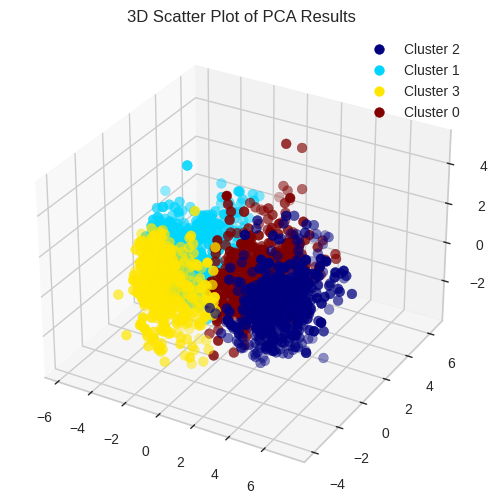

In [32]:
# Create a new figure for the 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Extract columns for the plot
x = PCA_ds['col1']
y = PCA_ds['col2']
z = PCA_ds['col3']

# Get unique clusters
clusters = PCA_ds['Clusters'].unique()

# Color map for clusters
colors = plt.cm.jet(np.linspace(0, 1, len(clusters)))

# Plot each cluster
for cluster, color in zip(clusters, colors):
    ix = PCA_ds['Clusters'] == cluster
    ax.scatter(x[ix], y[ix], z[ix], c=[color], label=f'Cluster {cluster}', s=50)

ax.set_title('3D Scatter Plot of PCA Results')
ax.legend()
plt.show()


It seems that the clusters are well defined, segmenting the dataset into four clusters.

# Evaluating the Model

As we are working with unsupervised clustering, we do not have labeled feature to directly evaluate or score our model. Instead, the focus is to examine the patterns within the formed clusters and understand their characteristics.

To achieve this, we can conduct exploratory data analysis to visualize the data across different clusters and derive insights, enabling us to draw meaningful conclusions about the underlying cluster patterns.

*Note that we can evaluate the clusters associated with both the scaled and the original data, as they correspond to the same rows.*

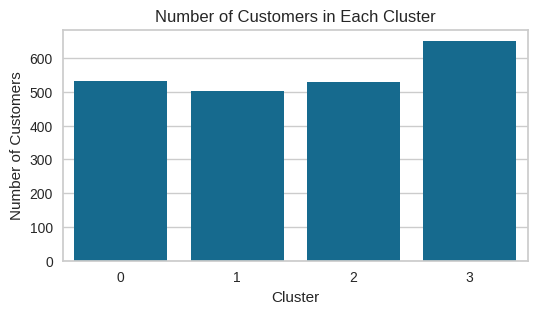

In [33]:
# Create a bar plot for the number of customers in each cluster
plt.figure(figsize=(6, 3))
sns.countplot(x='Clusters', data=data)
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

The clusters are well distributed among customers.

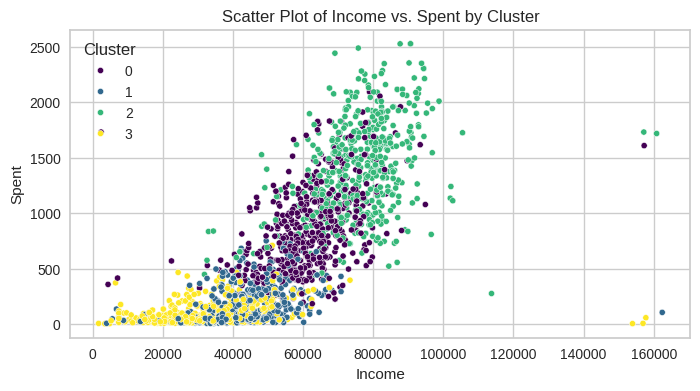

In [34]:
#scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Income', y='Spent', hue='Clusters', data=data, palette='viridis', s=20)

plt.title('Scatter Plot of Income vs. Spent by Cluster')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend(title='Cluster')
plt.show()

We can notice that:
- Clusters 1 and 3 have both low speding and low income.
- Cluster 0 has average spending and average income.
- Cluster 2 has high speding and high income.

## Radar Chart

Radar charts, also known as spider charts, effectively visualize multivariate data, facilitating the comparison of features across different groups. However, it's crucial to note that radar charts can be misleading if there is significant variation in the scales of the variables. Therefore, scaling the data appropriately is essential for accurate and meaningful visualizations.

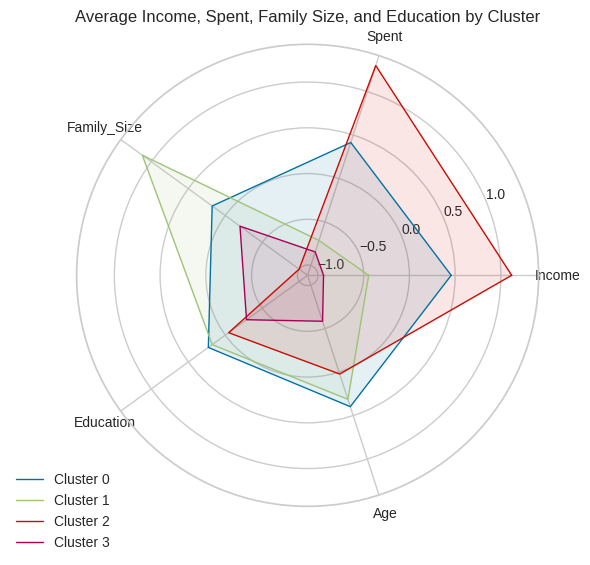

In [35]:
from math import pi

# Group by 'Clusters' and calculate the mean for 'Income', 'Spent', and 'Family_Size'
attributes = ['Income', 'Spent', 'Family_Size', 'Education', 'Age']
cluster_means = scaled_ds.groupby('Clusters')[attributes].mean().reset_index()

# Number of variables we're plotting.
num_vars = len(attributes)

# Compute angle each bar is centered on:
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Create a radar chart for each cluster
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Clusters"])}')
    ax.fill(angles, values, alpha=0.1)

# Labels for each attribute.
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

# Add legend and title
plt.title('Average Income, Spent, Family Size, and Education by Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


We can make the following observations:
- **Cluster 0**:  This cluster represents a middle group with moderate income and spending, and average family size. It contains the oldest demographic among all clusters.
- **Cluster 1**: This group exhibits low income and low spending levels, yet it has the largest family size. It predominantly consists of older customers.
- **Cluster 2**: This group boasts the highest income and spending, typically lives alone, and compromises the midle age group (40-50 years old)
- **Cluster 3**: Characterized by the lowest income and spending of all groups, this cluster has an average family size and is primarily made up of the youngest customers.

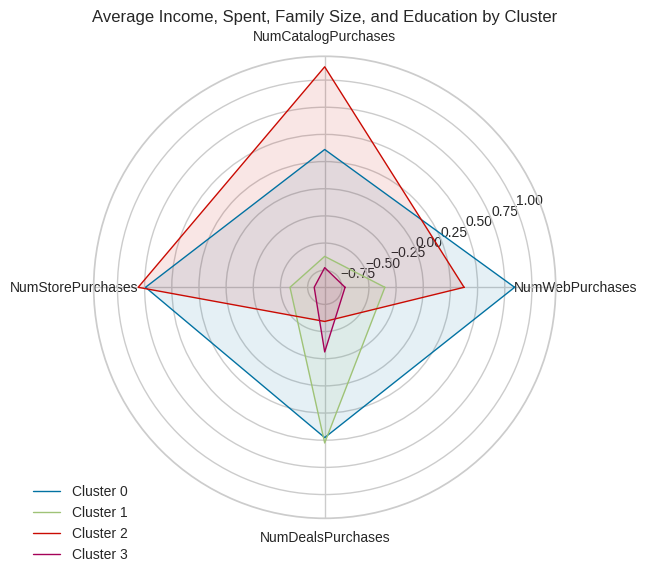

In [36]:
attributes = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
cluster_means = scaled_ds.groupby('Clusters')[attributes].mean().reset_index()

# Number of variables we're plotting.
num_vars = len(attributes)

# Compute angle each bar is centered on:
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Create a radar chart for each cluster
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Clusters"])}')
    ax.fill(angles, values, alpha=0.1)

# Labels for each attribute.
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

# Add legend and title
plt.title('Average Income, Spent, Family Size, and Education by Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


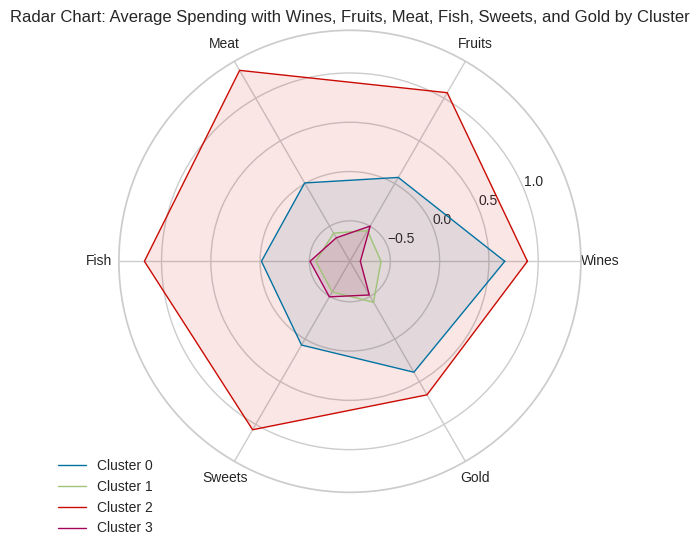

In [37]:
# Group by 'Clusters' and calculate the mean for ...
attributes = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
cluster_means = scaled_ds.groupby('Clusters')[attributes].mean().reset_index()

# Number of variables we're plotting.
num_vars = len(attributes)

# Compute angle each bar is centered on:
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Create a radar chart for each cluster
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Clusters"])}')
    ax.fill(angles, values, alpha=0.1)

# Labels for each attribute.
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

# Add legend and title
plt.title('Radar Chart: Average Spending with Wines, Fruits, Meat, Fish, Sweets, and Gold by Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


## Exploring the campaings performance

It is worth to recall that the campaings attributes were not used to cluster the customers, but its analysis can also give some insights regarding how was the campaings performance in each group (cluster).

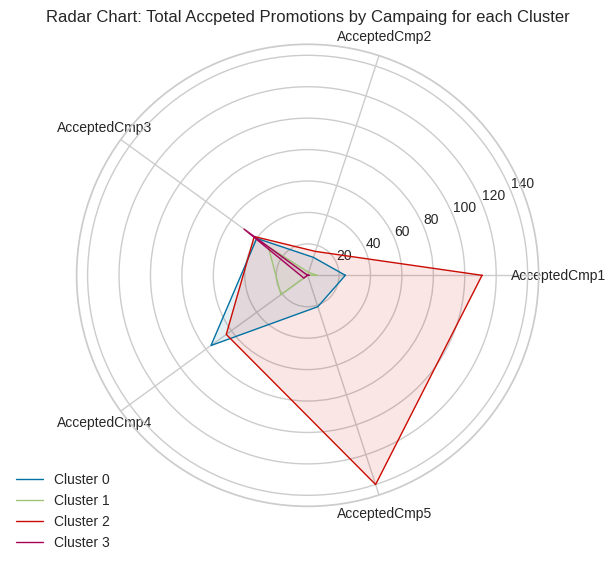

In [38]:
# Group by 'Clusters' and calculate the mean for ...
attributes = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cluster_means = data.groupby('Clusters')[attributes].sum().reset_index()

# Number of variables we're plotting.
num_vars = len(attributes)

# Compute angle each bar is centered on:
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Create a radar chart for each cluster
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Clusters"])}')
    ax.fill(angles, values, alpha=0.1)

# Labels for each attribute.
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

# Add legend and title
plt.title('Radar Chart: Total Accpeted Promotions by Campaing for each Cluster')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


Here's a revised version of your Conclusion section that refines the language, improves flow, and offers suggestions for future work:

# Conclusion

In this project, we have meticulously analyzed a Customer Dataset through the creation of customer segmentation. Our workflow encompassed data cleaning, extensive feature engineering, outlier management, and exploratory data analysis enhanced by visualizations. We then proceeded with data preprocessing, which included label encoding for categorical features, scaling of all features, and dimensionality reduction via PCA.

During the Machine Learning phase, we utilized the Elbow method to determine the optimal number of clusters (K) for the KMeans algorithm. After fitting the model, we conducted a thorough analysis of the resulting customer segments to extract distinct profiles for each cluster, revealing insightful patterns in consumer behavior.

### Insights on Cluster Profiles:
- **Cluster 0:**
    - Exhibits high to average income and spending.
    - Typically consists of families with 3 to 4 members.
    - Represents the oldest age demographic.
    - Shows significant expenditure on wines and gold.
    - Purchases are well-distributed across catalog, store, and web channels.
    - Predominantly responds to campaign 4.

- **Cluster 1:**
    - Characterized by low income and spending.
    - Contains the largest families, with 4 to 5 members.
    - Generally older in age.
    - Purchases primarily through deals.
    - Shows a low rate of campaign acceptance, with campaign 3 being the most accepted.

- **Cluster 2:**
    - Features the highest income and spending.
    - Primarily consists of singles.
    - Age range predominantly between 40 and 50 years.
    - Favors purchases from catalogs.
    - Shows a high acceptance rate for campaigns 1 and 5.

- **Cluster 3:**
    - Noted for the lowest income and spending.
    - Comprises families of 2 or 3 members.
    - Includes the youngest demographic.
    - Mostly undergraduate or graduate education levels.
    - Frequently purchases through deals.
    - Exhibits the lowest campaign acceptance, with campaign 3 being notably accepted.

### Future Recommendations

To enhance the robustness and applicability of our findings, future work could explore the integration of additional predictive modeling techniques and the application of advanced algorithms for dynamic segmentation. Employing time series analysis to track changes in customer behavior over time could provide deeper insights into trends and lifecycle patterns. Additionally, conducting A/B testing on selected campaigns within identified segments may offer concrete data on the effectiveness of targeted marketing strategies, thereby maximizing customer engagement and optimizing marketing spend.

This thoughtful approach not only underscores the detailed analysis undertaken but also highlights potential avenues for enriching the insights gleaned from customer data.